# **Task: 1**

# **Predict the prices of house using the Multiple Linear Regression**

#**Import libraries:**


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression

# **Import File:**

In [2]:
df=pd.read_csv("Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
5,10850000,7500,3,3,1,2
6,10150000,8580,4,3,4,2
7,10150000,16200,5,3,2,0
8,9870000,8100,4,1,2,2
9,9800000,5750,3,2,4,1


# **Data Cleaning:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


In [ ]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [ ]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# **Scaling  Features:**

In [ ]:
from sklearn import preprocessing
standardScaler=preprocessing.StandardScaler()
df[['area']]=standardScaler.fit_transform(df[['area']])

df[['price']]=standardScaler.fit_transform(df[['price']])

df.head()

,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,4,2,3,2
1,4.004484,1.757010,4,4,4,3
2,4.004484,2.218232,3,2,2,2
3,3.985755,1.083624,4,2,2,3
4,3.554979,1.046726,4,1,2,2


# **Define Input and Output Features:**

In [ ]:
x=df[['area','bathrooms','stories','parking','bedrooms']]
y=df[['price']]
x.head(10)

,area,bathrooms,stories,parking,bedrooms
0,1.046726,2,3,2,4
1,1.757010,4,4,3,4
2,2.218232,2,2,2,3
3,1.083624,2,2,3,4
4,1.046726,1,2,2,4
5,1.083624,3,1,2,3
6,1.581745,3,4,2,4
7,5.096263,3,2,0,5
8,1.360358,1,2,2,4
9,0.276484,2,4,1,3


# **Input Visulization:**

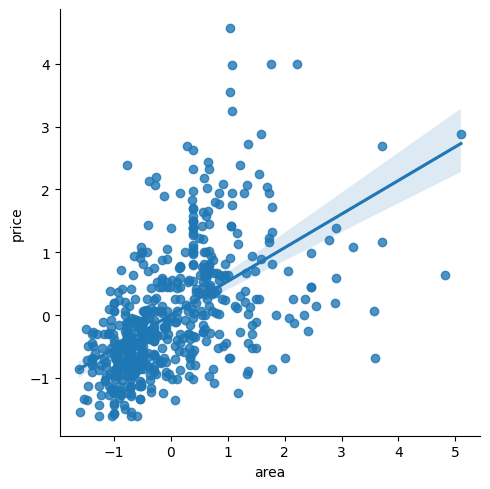

In [ ]:
import seaborn as sns
sns.lmplot(x="area",y="price",data=df)


# **Split X and Y:**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2 ,random_state=3)




# **Make arrays:**

In [ ]:
xtrain=np.array(x_train[['area','bathrooms','stories','parking','bedrooms']])
ytrain=np.array(y_train[['price']])

xtest=np.array(x_test[['area','bathrooms','stories','parking','bedrooms']])
ytest=np.array(y_test[['price']])

print(y_test)

        price
302 -0.303271
193  0.142488
107  0.726844
155  0.408445
490 -1.033716
..        ...
485 -1.014987
268 -0.205878
345 -0.490565
273 -0.228353
499 -1.127363

[109 rows x 1 columns]


# **Define Model:**

In [ ]:
model=LinearRegression()
model

LinearRegression()

# **Fit Model:**

In [ ]:
model.fit(xt,yt)
model

LinearRegression()

# **Prediction:**

In [ ]:
y_hat_train=model.predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# **Model Accuracy:**

In [ ]:
model.score(x_train,y_train)*100

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


57.280037739322196

#  **Data Visualization:**

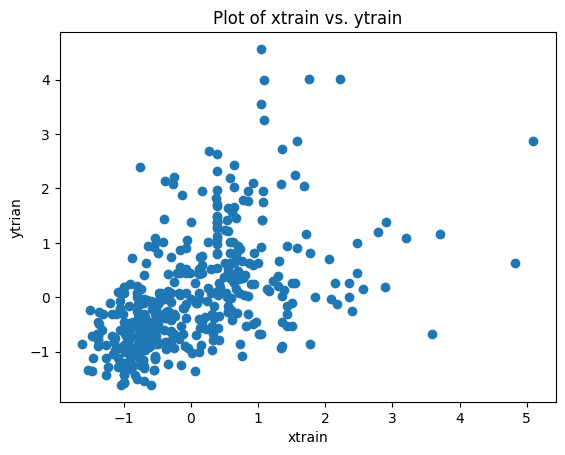

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xtrain[:,0],ytrain)
plt.xlabel('xtrain')  # Set label for x-axis
plt.ylabel('ytrian')   # Set label for y-axis
plt.title('Plot of xtrain vs. ytrain')  # Set title for the plot
plt.show()  # Display the plot

In [ ]:
y_hat=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test ,y_hat)*100


49.26144263965961

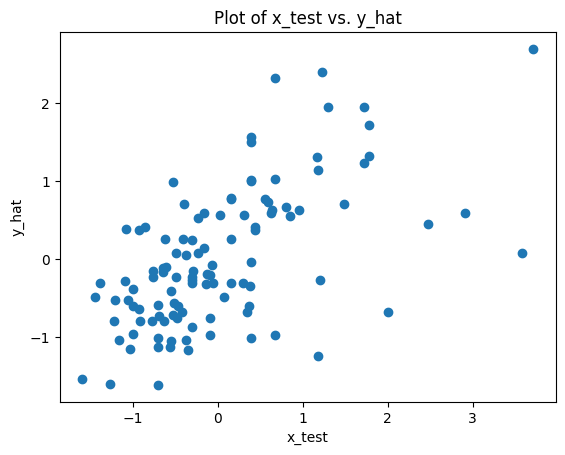

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(xtest[:,0],ytest)
plt.xlabel('x_test')  # Set label for x-axis
plt.ylabel('y_hat')   # Set label for y-axis
plt.title('Plot of x_test vs. y_hat')  # Set title for the plot
plt.show()  # Display the plot

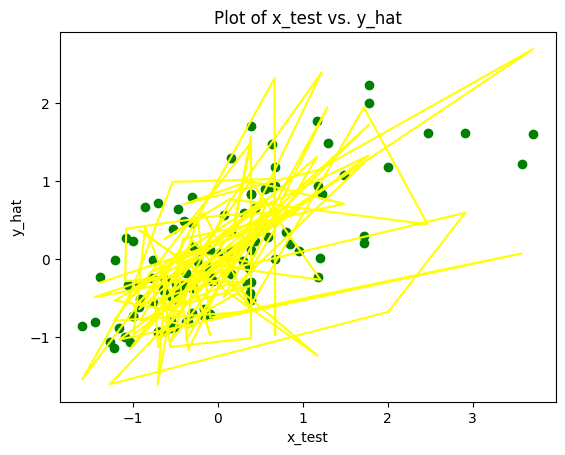

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xtest[:,0],y_hat,color='green')

# Assuming x_test and y_hat are your data arrays
plt.plot(xtest[:,0], ytest, color="yellow")
plt.xlabel('x_test')  # Set label for x-axis
plt.ylabel('y_hat')   # Set label for y-axis
plt.title('Plot of x_test vs. y_hat')  # Set title for the plot
plt.show()  # Display the plot


# **Thank You**